<a href="https://colab.research.google.com/github/GzpTez0514/-sklearn/blob/main/%E6%9C%BA%E5%99%A8%E5%AD%A6%E4%B9%A0_%E6%94%AF%E6%8C%81%E5%90%91%E9%87%8F%E6%9C%BA01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

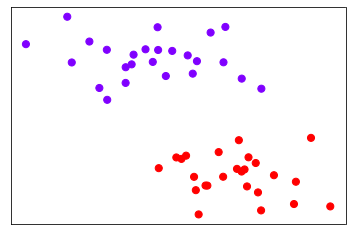

In [18]:
from sklearn.datasets import make_blobs
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import numpy as np

# 实例化数据集
X, y = make_blobs(n_samples=50, centers=2, random_state=0, cluster_std=0.6)
plt.scatter(X[:, 0],X[:, 1], c=y, s=50, cmap='rainbow')
plt.xticks([])
plt.yticks([])
plt.show()

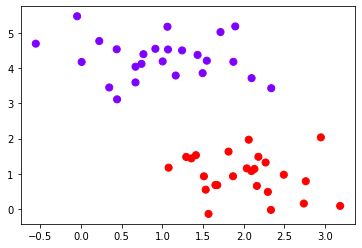

In [19]:
# 画决策边界，contour:绘制等高线函数
# 首先要有散点图
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='rainbow')
ax = plt.gca()  # 获取当前的子图，如果不存在，则创建新的子图

In [20]:
# 画决策边界：制作网格，用meshgrid
# 获取平上面两条坐标轴的最大值和最小值
xlim = ax.get_xlim()
print(xlim)
ylim = ax.get_ylim()
print(ylim)

(-0.7425578984849813, 3.3721920271976598)
(-0.41872382476349596, 5.754870487889891)


In [21]:
# 在最大值和最小值之间形成30个规律的数据
axisx = np.linspace(xlim[0], xlim[1], 30)
axisy = np.linspace(ylim[0], ylim[1], 30)
print(axisx.shape)
print(axisy.shape)

(30,)
(30,)


In [22]:
# 使用meshgrid函数将两个一维向量转换为特征矩阵，核心是将两个特征向量进行广播
axisx, axisy = np.meshgrid(axisx, axisy)
print(axisx.shape)
print(axisy.shape)

(30, 30)
(30, 30)


In [23]:
# ravel()是降维函数，vstack能够将多个结构一致的多维数组上下合并
# xy就是已经形成的网格，它是遍布在整个画布上的密集的点
xy = np.vstack([axisx.ravel(), axisy.ravel()]).T
print(xy)

[[-0.7425579  -0.41872382]
 [-0.60066997 -0.41872382]
 [-0.45878204 -0.41872382]
 ...
 [ 3.08841617  5.75487049]
 [ 3.2303041   5.75487049]
 [ 3.37219203  5.75487049]]


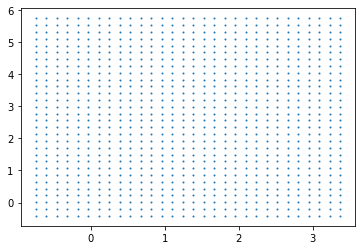

In [24]:
plt.scatter(xy[:, 0], xy[:, 1], s=1, cmap='rainbow')

In [25]:
# 举例（meshgrid、ravel和vstack）
a = np.array([1, 2, 3])
b = np.array([7, 8])
v1, v2 = np.meshgrid(a, b)
print(v1)
print(v2)
print(v1.ravel())
print(v2.ravel())
v = np.vstack([v1.ravel(), v2.ravel()]).T

[[1 2 3]
 [1 2 3]]
[[7 7 7]
 [8 8 8]]
[1 2 3 1 2 3]
[7 7 7 8 8 8]


(-0.41872382476349596, 5.754870487889891)

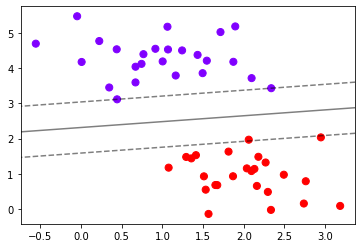

In [30]:
# 建模，通过fit计算出对应的决策边界
clf = SVC(kernel='linear').fit(X,y)
# 接口decidion_function(), 返回每个输入样本所对应的到决策边界的距离
# 然后再将这个距离转换为axisx的结构，这是由于画图的函数contour要求z的结构必须与meshgrid()创建后返回的结构一致
Z = clf.decision_function(xy).reshape(axisx.shape)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='rainbow')
ax = plt.gca()

# 画出决策边界和平行于决策边界的超平面
ax.contour(axisx, axisy, Z,
     colors='k',
     levels=[-1, 0, 1],   # 画三条等高线，分别为-1， 0， 1
     alpha=0.5,
     linestyles=['--', '-', '--'])
ax.set_xlim(xlim)
ax.set_ylim(ylim)
